In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR

import warnings 
warnings.filterwarnings("ignore")

#here i removed grangercausality test since i already know about them

In [31]:
url = 'https://raw.githubusercontent.com/selva86/datasets/master/Raotbl6.csv'
data1 = pd.read_csv(url, parse_dates = ['date'], index_col = 'date')

In [32]:
data_columns = data1.columns
data_columns

Index(['rgnp', 'pgnp', 'ulc', 'gdfco', 'gdf', 'gdfim', 'gdfcf', 'gdfce'], dtype='object')

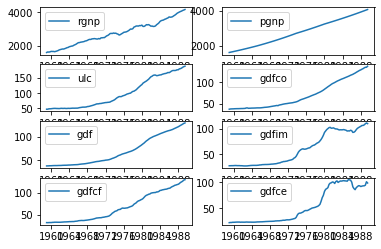

In [33]:
for i,j in zip(data_columns, range(1,len(data_columns)+1)):
    plt.subplot(4,2,j)
    plt.plot(data1[i], label = data_columns[j-1])
    plt.legend(loc = 'best')
    

In [34]:
data = data1[['gdfim', 'gdfce']]
data2 = data1[['gdfim', 'gdfce']]
data_columns = data.columns
data_columns

Index(['gdfim', 'gdfce'], dtype='object')

In [35]:
for i in data_columns:
    adfuller_result_pgnp = adfuller(data[i].diff()[1:])
    print("ADF statistics "+i+"  : ", adfuller_result_pgnp[0])
    print("P value : "+i+" ", adfuller_result_pgnp[1])

ADF statistics gdfim  :  -4.244421412664248
P value : gdfim  0.000553653708669569
ADF statistics gdfce  :  -2.044709590959794
P value : gdfce  0.2673198799246977


In [36]:
train_data = data2[:-6]
test_data = data2[-6:]
train_data.shape, test_data.shape
train_data

,gdfim,gdfce
date,,
1959-01-01,26.9,23.1
1959-04-01,27.0,23.4
1959-07-01,27.1,23.4
1959-10-01,27.1,23.8
1960-01-01,27.2,23.8
...,...,...
1987-01-01,97.9,89.4
1987-04-01,100.4,91.3
1987-07-01,101.9,93.1


In [37]:
model = VAR(train_data)

sorted_order = model.select_order(maxlags = 20)
sorted_order.summary()

,AIC,BIC,FPE,HQIC
0,10.55,10.61,3.828e+04,10.57
1,1.025,1.184,2.786,1.089
2,0.4180,0.6834*,1.519,0.5253
3,0.4736,0.8452,1.607,0.6239
4,0.5197,0.9975,1.683,0.7129
5,0.5862,1.170,1.801,0.8223
6,0.5839,1.274,1.799,0.8629
7,0.4668,1.263,1.603,0.7888
8,0.5334,1.436,1.717,0.8983
9,0.4900,1.499,1.649,0.8978


In [38]:
var_model = VARMAX(train_data, order=(4,0), enforce_stationary = True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                           Statespace Model Results                           
Dep. Variable:     ['gdfim', 'gdfce']   No. Observations:                  117
Model:                         VAR(4)   Log Likelihood                -327.961
                          + intercept   AIC                            697.923
Date:                Mon, 20 Dec 2021   BIC                            755.929
Time:                        17:57:21   HQIC                           721.473
Sample:                    01-01-1959                                         
                         - 01-01-1988                                         
Covariance Type:                  opg                                         
Ljung-Box (Q):                55.47, 63.82   Jarque-Bera (JB):         30.20, 78.23
Prob(Q):                        0.05, 0.01   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):       36.29, 54.07   Skew:                       0.34, 0.42
Prob(H) (two-sided):            0.00,

In [39]:
n_forecast = 12
predict = fitted_model.get_prediction(start = len(train_data), end=len(train_data) + n_forecast)
predictions = predict.predicted_mean

In [51]:
predictions.columns = ['gdfim_predicted','gdfce_predicted']
predictions

,gdfim_predicted,gdfce_predicted
1988-04-01,105.917659,92.233993
1988-07-01,107.703391,94.071820
1988-10-01,109.630608,96.136189
1989-01-01,111.551490,98.465342
1989-04-01,113.435007,100.942292
...,...,...
1990-04-01,120.204939,110.396718
1990-07-01,121.684736,112.558925
1990-10-01,123.080860,114.624563
1991-01-01,124.395510,116.591256


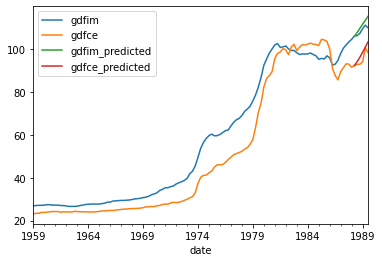

In [52]:
data2['gdfim_predicted'] = predictions['gdfim_predicted']
data2['gdfce_predicted'] = predictions['gdfce_predicted']
data2.plot()

In [53]:
predictions['gdfim_predicted']

1988-04-01    105.917659
1988-07-01    107.703391
1988-10-01    109.630608
1989-01-01    111.551490
1989-04-01    113.435007
1989-07-01    115.254281
1989-10-01    116.990082
1990-01-01    118.640064
1990-04-01    120.204939
1990-07-01    121.684736
1990-10-01    123.080860
1991-01-01    124.395510
1991-04-01    125.630948
Freq: QS-OCT, Name: gdfim_predicted, dtype: float64

In [54]:
from sklearn.metrics import mean_squared_error as MSE
print("MSE of gdfim : ",MSE(predictions['gdfim_predicted'][0:6],data2['gdfim'][-6:]))
print("MSE of gdfce : ",MSE(predictions['gdfce_predicted'][0:6],data2['gdfce'][-6:]))


MSE of gdfim :  7.855869270700128
MSE of gdfce :  9.861593604067565
